In [34]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd

In [41]:
df2_ = pd.read_csv('./csv/gp_ucb/gp_ucb_2.csv')
df2_

,f_sigma,f_max,noise,alpha,beta,total_reward,seed
0,0.1,0.6,0.05,0.05,0.05,153,2
1,0.1,0.6,0.05,0.05,0.10,63,2
2,0.1,0.6,0.05,0.05,0.15,150,2
3,0.1,0.6,0.05,0.05,0.20,133,2
4,0.1,0.6,0.05,0.05,0.25,152,2
...,...,...,...,...,...,...,...
1291,0.3,0.6,0.30,0.30,0.10,189,3
1292,0.3,0.6,0.30,0.30,0.15,162,3
1293,0.3,0.6,0.30,0.30,0.20,189,3
1294,0.3,0.6,0.30,0.30,0.25,79,3


In [42]:
f_max = 0.6
f_sigma = 0.3
df2 = df2_[(df2_['f_max'] == f_max) & (df2_['f_sigma'] == f_sigma)]

n_play = 300
t_t_r = f_max * n_play

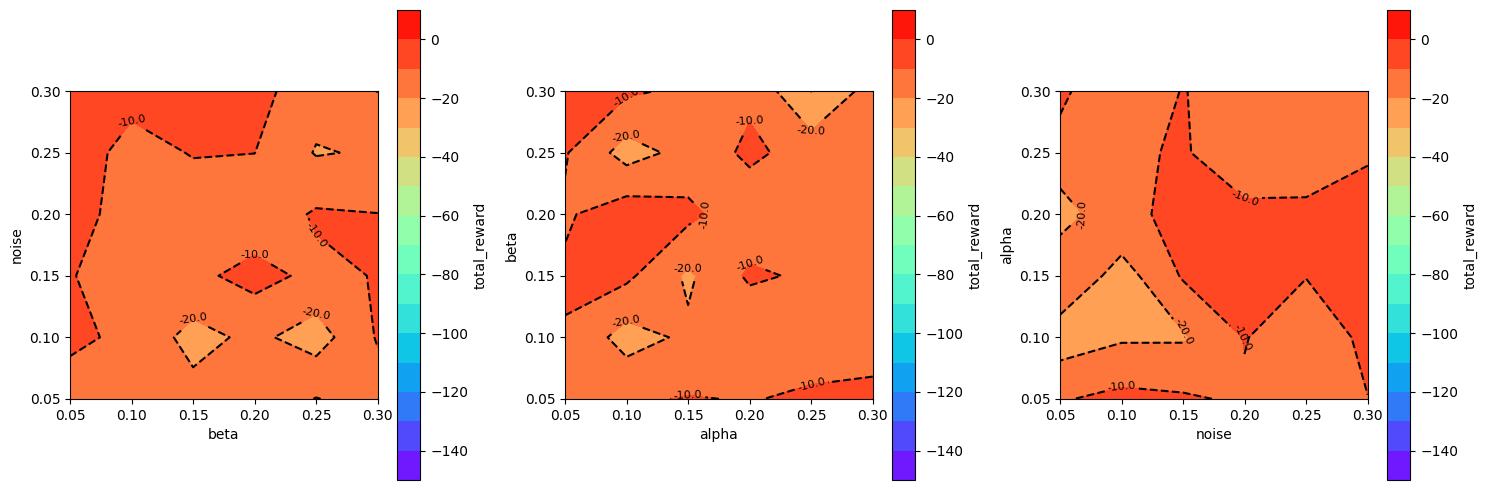

In [43]:
import matplotlib.pyplot as plt
import numpy as np
lev = [i for i in range(-150, 15, 10)]

# Noise-Beta Plot
df_subset1 = df2[['noise', 'alpha', 'beta', 'total_reward']]
df_subset1 = df_subset1.groupby(['noise', 'beta'])['total_reward'].mean().reset_index()

pivot_table1 = df_subset1.pivot(index='noise', columns='beta', values='total_reward')
pivot_table1 = pivot_table1.fillna(0)

X1 = pivot_table1.columns.values
Y1 = pivot_table1.index.values
Z1 = pivot_table1.values - t_t_r
X1, Y1 = np.meshgrid(X1, Y1)

# Alpha-Beta Plot
df_subset2 = df2[['noise', 'alpha', 'beta', 'total_reward']]
df_subset2 = df_subset2.groupby(['alpha', 'beta'])['total_reward'].mean().reset_index()

pivot_table2 = df_subset2.pivot(index='alpha', columns='beta', values='total_reward')
pivot_table2 = pivot_table2.fillna(0)

X2 = pivot_table2.columns.values
Y2 = pivot_table2.index.values
Z2 = pivot_table2.values - t_t_r
X2, Y2 = np.meshgrid(X2, Y2)

# Alpha-Noise Plot
df_subset3 = df2[['noise', 'alpha', 'beta', 'total_reward']]
df_subset3 = df_subset3.groupby(['alpha', 'noise'])['total_reward'].mean().reset_index()

pivot_table3 = df_subset3.pivot(index='alpha', columns='noise', values='total_reward')
pivot_table3 = pivot_table3.fillna(0)

X3 = pivot_table3.columns.values
Y3 = pivot_table3.index.values
Z3 = pivot_table3.values - t_t_r
X3, Y3 = np.meshgrid(X3, Y3)

# Create a figure
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot Noise-Beta
c1 = axs[0].contour(X1, Y1, Z1,colors='black', levels=lev)
c1.clabel(fmt='%1.1f', fontsize=8) 
c1 = axs[0].contourf(X1, Y1, Z1,cmap='rainbow', levels=lev)  

fig.colorbar(c1, ax=axs[0], label='total_reward')
axs[0].set_ylabel('noise')
axs[0].set_xlabel('beta')
axs[0].set_aspect('equal')

# Plot Alpha-Beta
c2 = axs[1].contour(X2, Y2, Z2,colors='black', levels=lev)
c2.clabel(fmt='%1.1f', fontsize=8) 
c2 = axs[1].contourf(X2, Y2, Z2,cmap='rainbow', levels=lev)  

fig.colorbar(c2, ax=axs[1], label='total_reward')
axs[1].set_xlabel('alpha')
axs[1].set_ylabel('beta')
axs[1].set_aspect('equal')

# Plot Alpha-Noise

c3 = axs[2].contour(X3, Y3, Z3,colors='black', levels=lev)
c3.clabel(fmt='%1.1f', fontsize=8) 
c3 = axs[2].contourf(X3, Y3, Z3,cmap='rainbow', levels=lev)  

fig.colorbar(c3, ax=axs[2], label='total_reward')
axs[2].set_ylabel('alpha')
axs[2].set_xlabel('noise')
axs[2].set_aspect('equal')

# Show the figure
plt.tight_layout()
plt.show()

In [44]:
f_sigma = 0.2
df2 = df2_[(df2_['f_max'] == f_max) & (df2_['f_sigma'] == f_sigma)]

n_play = 300
t_t_r = f_max * n_play
df2

,f_sigma,f_max,noise,alpha,beta,total_reward,seed
216,0.2,0.6,0.05,0.05,0.05,161,2
217,0.2,0.6,0.05,0.05,0.10,110,2
218,0.2,0.6,0.05,0.05,0.15,163,2
219,0.2,0.6,0.05,0.05,0.20,149,2
220,0.2,0.6,0.05,0.05,0.25,144,2
...,...,...,...,...,...,...,...
1075,0.2,0.6,0.30,0.30,0.10,187,3
1076,0.2,0.6,0.30,0.30,0.15,174,3
1077,0.2,0.6,0.30,0.30,0.20,186,3
1078,0.2,0.6,0.30,0.30,0.25,127,3


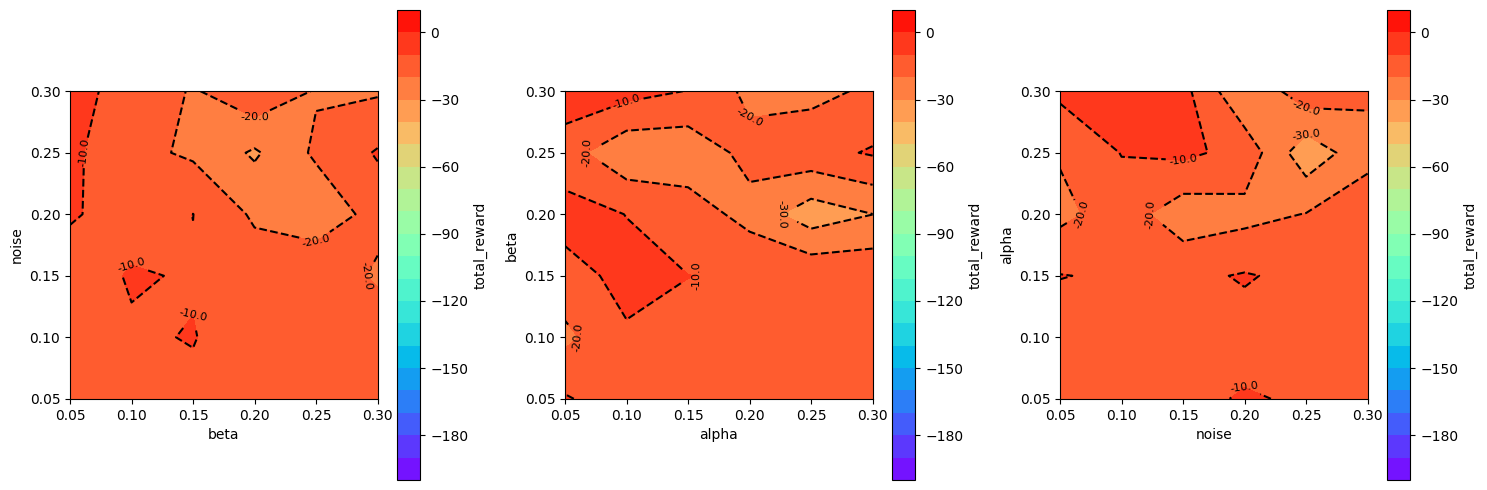

In [45]:
import matplotlib.pyplot as plt
import numpy as np
lev = [i for i in range(-200, 15, 10)]

# Noise-Beta Plot
df_subset1 = df2[['noise', 'alpha', 'beta', 'total_reward']]
df_subset1 = df_subset1.groupby(['noise', 'beta'])['total_reward'].mean().reset_index()

pivot_table1 = df_subset1.pivot(index='noise', columns='beta', values='total_reward')
pivot_table1 = pivot_table1.fillna(0)

X1 = pivot_table1.columns.values
Y1 = pivot_table1.index.values
Z1 = pivot_table1.values - t_t_r
X1, Y1 = np.meshgrid(X1, Y1)

# Alpha-Beta Plot
df_subset2 = df2[['noise', 'alpha', 'beta', 'total_reward']]
df_subset2 = df_subset2.groupby(['alpha', 'beta'])['total_reward'].mean().reset_index()

pivot_table2 = df_subset2.pivot(index='alpha', columns='beta', values='total_reward')
pivot_table2 = pivot_table2.fillna(0)

X2 = pivot_table2.columns.values
Y2 = pivot_table2.index.values
Z2 = pivot_table2.values - t_t_r
X2, Y2 = np.meshgrid(X2, Y2)

# Alpha-Noise Plot
df_subset3 = df2[['noise', 'alpha', 'beta', 'total_reward']]
df_subset3 = df_subset3.groupby(['alpha', 'noise'])['total_reward'].mean().reset_index()

pivot_table3 = df_subset3.pivot(index='alpha', columns='noise', values='total_reward')
pivot_table3 = pivot_table3.fillna(0)

X3 = pivot_table3.columns.values
Y3 = pivot_table3.index.values
Z3 = pivot_table3.values - t_t_r
X3, Y3 = np.meshgrid(X3, Y3)

# Create a figure
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot Noise-Beta
c1 = axs[0].contour(X1, Y1, Z1,colors='black', levels=lev)
c1.clabel(fmt='%1.1f', fontsize=8) 
c1 = axs[0].contourf(X1, Y1, Z1,cmap='rainbow', levels=lev)  

fig.colorbar(c1, ax=axs[0], label='total_reward')
axs[0].set_ylabel('noise')
axs[0].set_xlabel('beta')
axs[0].set_aspect('equal')

# Plot Alpha-Beta
c2 = axs[1].contour(X2, Y2, Z2,colors='black', levels=lev)
c2.clabel(fmt='%1.1f', fontsize=8) 
c2 = axs[1].contourf(X2, Y2, Z2,cmap='rainbow', levels=lev)  

fig.colorbar(c2, ax=axs[1], label='total_reward')
axs[1].set_xlabel('alpha')
axs[1].set_ylabel('beta')
axs[1].set_aspect('equal')

# Plot Alpha-Noise

c3 = axs[2].contour(X3, Y3, Z3,colors='black', levels=lev)
c3.clabel(fmt='%1.1f', fontsize=8) 
c3 = axs[2].contourf(X3, Y3, Z3,cmap='rainbow', levels=lev)  

fig.colorbar(c3, ax=axs[2], label='total_reward')
axs[2].set_ylabel('alpha')
axs[2].set_xlabel('noise')
axs[2].set_aspect('equal')

# Show the figure
plt.tight_layout()
plt.show()

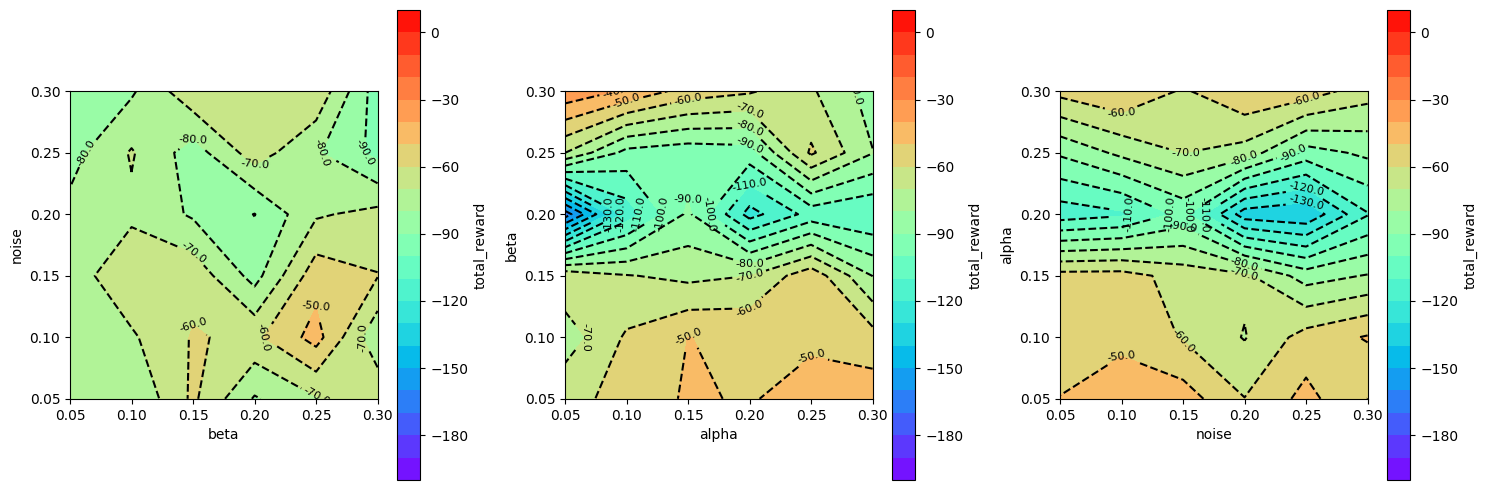

In [47]:
import matplotlib.pyplot as plt
import numpy as np
lev = [i for i in range(-200, 15, 10)]

# Noise-Beta Plot
df_subset1 = df2[['noise', 'alpha', 'beta', 'total_reward']]
df_subset1 = df_subset1.groupby(['noise', 'beta'])['total_reward'].mean().reset_index()

pivot_table1 = df_subset1.pivot(index='noise', columns='beta', values='total_reward')
pivot_table1 = pivot_table1.fillna(0)

X1 = pivot_table1.columns.values
Y1 = pivot_table1.index.values
Z1 = pivot_table1.values - t_t_r
X1, Y1 = np.meshgrid(X1, Y1)

# Alpha-Beta Plot
df_subset2 = df2[['noise', 'alpha', 'beta', 'total_reward']]
df_subset2 = df_subset2.groupby(['alpha', 'beta'])['total_reward'].mean().reset_index()

pivot_table2 = df_subset2.pivot(index='alpha', columns='beta', values='total_reward')
pivot_table2 = pivot_table2.fillna(0)

X2 = pivot_table2.columns.values
Y2 = pivot_table2.index.values
Z2 = pivot_table2.values - t_t_r
X2, Y2 = np.meshgrid(X2, Y2)

# Alpha-Noise Plot
df_subset3 = df2[['noise', 'alpha', 'beta', 'total_reward']]
df_subset3 = df_subset3.groupby(['alpha', 'noise'])['total_reward'].mean().reset_index()

pivot_table3 = df_subset3.pivot(index='alpha', columns='noise', values='total_reward')
pivot_table3 = pivot_table3.fillna(0)

X3 = pivot_table3.columns.values
Y3 = pivot_table3.index.values
Z3 = pivot_table3.values - t_t_r
X3, Y3 = np.meshgrid(X3, Y3)

# Create a figure
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot Noise-Beta
c1 = axs[0].contour(X1, Y1, Z1,colors='black', levels=lev)
c1.clabel(fmt='%1.1f', fontsize=8) 
c1 = axs[0].contourf(X1, Y1, Z1,cmap='rainbow', levels=lev)  

fig.colorbar(c1, ax=axs[0], label='total_reward')
axs[0].set_ylabel('noise')
axs[0].set_xlabel('beta')
axs[0].set_aspect('equal')

# Plot Alpha-Beta
c2 = axs[1].contour(X2, Y2, Z2,colors='black', levels=lev)
c2.clabel(fmt='%1.1f', fontsize=8) 
c2 = axs[1].contourf(X2, Y2, Z2,cmap='rainbow', levels=lev)  

fig.colorbar(c2, ax=axs[1], label='total_reward')
axs[1].set_xlabel('alpha')
axs[1].set_ylabel('beta')
axs[1].set_aspect('equal')

# Plot Alpha-Noise

c3 = axs[2].contour(X3, Y3, Z3,colors='black', levels=lev)
c3.clabel(fmt='%1.1f', fontsize=8) 
c3 = axs[2].contourf(X3, Y3, Z3,cmap='rainbow', levels=lev)  

fig.colorbar(c3, ax=axs[2], label='total_reward')
axs[2].set_ylabel('alpha')
axs[2].set_xlabel('noise')
axs[2].set_aspect('equal')

# Show the figure
plt.tight_layout()
plt.show()

In [46]:
f_sigma = 0.1
df2 = df2_[(df2_['f_max'] == f_max) & (df2_['f_sigma'] == f_sigma)]

n_play = 300
t_t_r = f_max * n_play
df2

,f_sigma,f_max,noise,alpha,beta,total_reward,seed
0,0.1,0.6,0.05,0.05,0.05,153,2
1,0.1,0.6,0.05,0.05,0.10,63,2
2,0.1,0.6,0.05,0.05,0.15,150,2
3,0.1,0.6,0.05,0.05,0.20,133,2
4,0.1,0.6,0.05,0.05,0.25,152,2
...,...,...,...,...,...,...,...
859,0.1,0.6,0.30,0.30,0.10,144,3
860,0.1,0.6,0.30,0.30,0.15,147,3
861,0.1,0.6,0.30,0.30,0.20,137,3
862,0.1,0.6,0.30,0.30,0.25,25,3


In [25]:
df_subset4 = df2_
max_reward = df_subset4['total_reward'].max()
max_reward_records = df_subset4[df_subset4['total_reward'] == max_reward]
max_reward_records

,f_sigma,f_max,noise,alpha,beta,total_reward,seed
434,0.3,0.6,0.05,0.05,0.15,174,1
462,0.3,0.6,0.05,0.30,0.05,174,1
570,0.3,0.6,0.20,0.30,0.05,174,1
583,0.3,0.6,0.25,0.10,0.10,174,1
607,0.3,0.6,0.25,0.30,0.10,174,1
608,0.3,0.6,0.25,0.30,0.15,174,1
